# Project: Classification - Loan Eligibility Prediction

----
## Context: 
-------

Credit risk is the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

------------------
## Objective:
------------
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

--------
## Attributes Information:
------------

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries and Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
df.shape

#The dataset contains 614 observations and 13 variables

(614, 13)

### Exploring data

In [5]:
df.info()
#There exist missing values for most of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [5]:
#Lets analysze the distribution of the various attribute

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's these missing values has to be imputed`

In [6]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [7]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


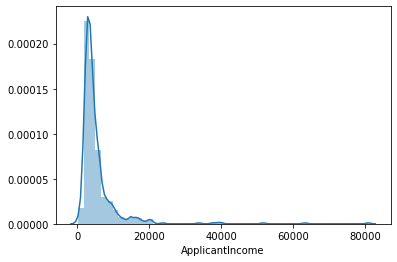

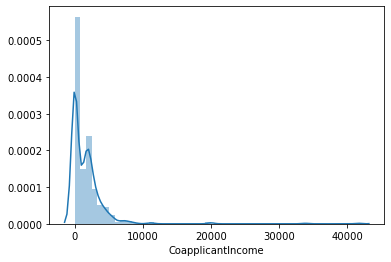

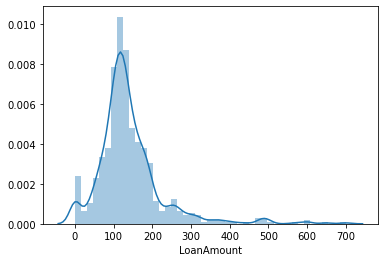

In [8]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [9]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [10]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [11]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

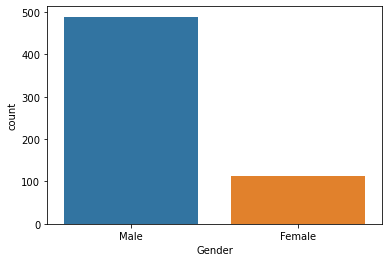

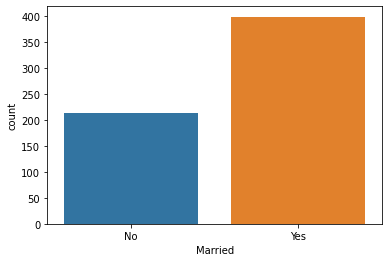

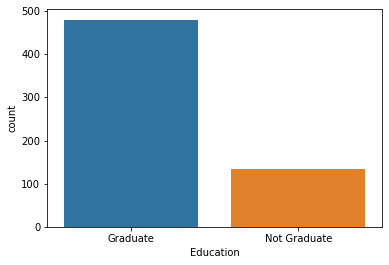

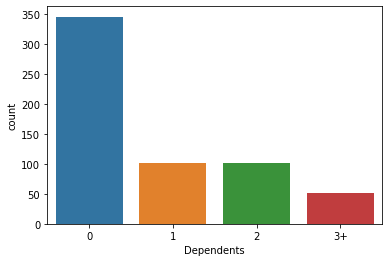

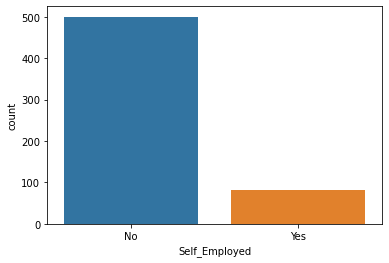

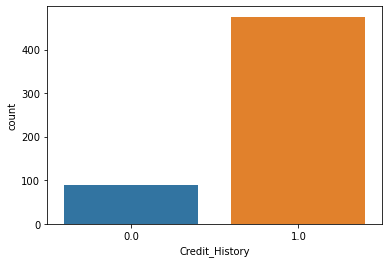

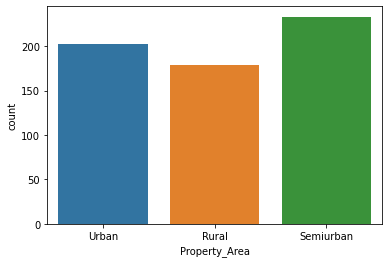

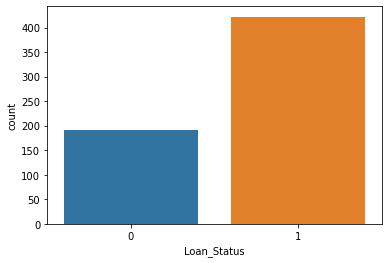

In [12]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(cr_df[i])
    plt.show()


In [13]:
# Calculate baseline proportion.

# You code here

cr_df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

**Insights:**

There is some imbalance in the dataset. If the model predicts every loan as eligible then our error rate based on the average(worst) model will be high, i.e. 30%.

This might be a reflection of real world scenarios as generally more loans are approved than rejected. To preserve that general observation we will not transform the data instead use stratify to ensure the train and test data sets have appropriate split based on the Loan Status, the target variable.

### Handling of null/missing data

In [14]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#Replacing null values with 0 for Credit History & Dependents variable

#taking backup of dataframe
cr_df_bkp = cr_df.copy()


#Use fillna method of DataFrame to replace 
cr_df['Credit_History'].fillna(0,inplace=True)
print('After Replacing Credit_History', cr_df['Credit_History'].isna().sum())

cr_df['Dependents'].fillna('0',inplace=True)
print('After Replacing Dependents', cr_df['Dependents'].isna().sum())


After Replacing Credit_History 0
After Replacing Dependents 0


In [16]:
#Replacing null values with No for Self Employed variable
cr_df['Self_Employed'].fillna('No',inplace=True)
print('After Replacing Self_Employed', cr_df['Self_Employed'].isna().sum())

After Replacing Self_Employed 0


In [17]:
#Replacing null values in Gender as Female where CoapplicantIncome is 0

cr_df.loc[((cr_df['CoapplicantIncome']==0) & (cr_df['Gender'].isnull())),'Gender'] = 'Female'
#Replacing null values in Gender as Male
cr_df.loc[cr_df['Gender'].isnull(),'Gender']='Male'

#We are assuming that when coapplicant income is 0, the gender is female
#because generally housewifes have 0 income

In [18]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [19]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Male,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Propert_Area is Urban then mostly they are married.(mode)`

In [20]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [21]:
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Bivariate Analysis 


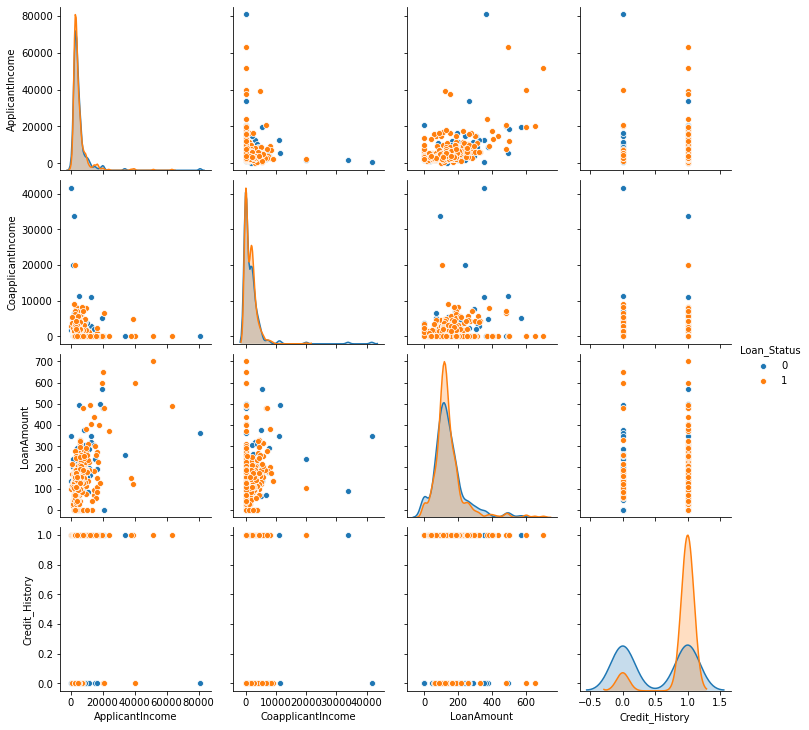

In [22]:
# Your Code here for the pairplot
sns.pairplot(cr_df,hue='Loan_Status')

#The distribution of the ApplicantIncome CoapplicantIncome and LoanAmount
#have similar shape for Loan Status 0 & 1, they are all right skewed


In [23]:
cr_df.groupby(['Loan_Status']).median()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,3833.5,268.0,126.5,1.0
1,3812.5,1239.5,125.0,1.0


In [24]:
cr_df.groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,5446.078125,1877.807292,142.557292,0.505208
1,5384.068720,1504.516398,140.533175,0.895735


In [25]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Gender,,
Female,0.322034,0.677966
Male,0.310484,0.689516


In [26]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [27]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [28]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [29]:
#cross tab for dependents and loan status

pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='index')

#Applicants with 2 dependents have more loans approved than others

Loan_Status,0,1
Dependents,,
0,0.313889,0.686111
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


In [30]:
#Cross tab for the property type and loan status and state the findings

pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='index')

#More loans are approved for Semiurban property types

Loan_Status,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


### Data Preparation 

In [31]:
# Define X and Y variables

Y = cr_df['Loan_Status'].astype('category')
X = cr_df.drop(columns=['Loan_Status'])

In [32]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban


In [33]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: category
Categories (2, int64): [0, 1]

In [34]:
# Convert categorical vriables to dummy variables
       
dummy_var = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
#Uncomment below to answer

X = pd.get_dummies(data=X,columns=dummy_var, drop_first=True)

X.shape



(614, 13)

In [35]:
## Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

### Model building using Logistic Regression from Sklearn

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=42,fit_intercept=False)
logreg.fit(X_train,Y_train)  # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=42)

In [37]:
 # Predicting the target variable on test data
y_predict = logreg.predict(X_test)             

In [38]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()

z['Observed Loan Status'] = Y_test
z['Predicted Loan Status'] = y_predict
z.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221,0.0,60,1,1,0,0,0,0,0,0,0,1,0,0
109,2071,754.0,94,1,1,0,0,1,1,0,1,1,0,1,1
569,3166,2064.0,104,1,1,0,0,0,0,0,0,0,1,0,0
330,4384,1793.0,117,1,0,1,0,0,0,0,1,0,1,1,1
407,2213,0.0,66,0,0,0,0,0,1,0,1,0,0,1,1


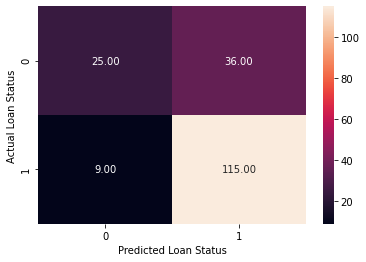

In [42]:
## function to get confusion matrix in a proper format

def draw_cm( test, predict ):
    cm = confusion_matrix(test, predict)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Actual Loan Status')
    plt.xlabel('Predicted Loan Status')
    plt.show()

draw_cm(Y_test,y_predict)

In [40]:

print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.41      0.53        61
           1       0.76      0.93      0.84       124

    accuracy                           0.76       185
   macro avg       0.75      0.67      0.68       185
weighted avg       0.75      0.76      0.73       185



In [49]:
# Coefficients 

fi = pd.DataFrame()
fi['Feature'] = X_test.columns
fi.shape
fi['Coeff'] = np.round(abs(logreg.coef_),2).T
fi.sort_values(by='Coeff',ascending=False)

,Feature,Coeff
10,Credit_History_1.0,1.62
11,Property_Area_Semiurban,0.58
8,Education_Not Graduate,0.42
4,Married_Yes,0.26
3,Gender_Male,0.23
6,Dependents_2,0.23
5,Dependents_1,0.19
12,Property_Area_Urban,0.09
7,Dependents_3+,0.07
9,Self_Employed_Yes,0.04


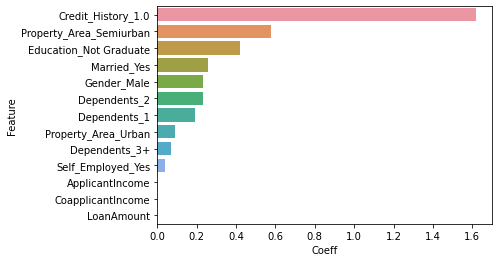

In [50]:
sns.barplot(x='Coeff',y='Feature', data=fi.sort_values(by='Coeff',ascending=False))

### kNN model Implementation

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1,15):
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.20)
    #let us scale the data. Notice the scaling done in the videos.
        x_train = ss.fit_transform(x_train)
        x_val = ss.transform(x_val) # transform the validation set
        knn.fit(x_train, y_train)
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_val, y_val))
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.3635658914728682],
 2: [0.16734693877551018, 0.40232558139534885],
 3: [0.19319727891156466, 0.3003875968992248],
 4: [0.19805636540330418, 0.3302325581395349],
 5: [0.2117589893100097, 0.30387596899224806],
 6: [0.22031098153547132, 0.3104651162790697],
 7: [0.23148688046647237, 0.32054263565891467],
 8: [0.24062196307094263, 0.30581395348837204],
 9: [0.25267249757045673, 0.3003875968992248],
 10: [0.24781341107871718, 0.3054263565891472],
 11: [0.2599611273080661, 0.3069767441860464],
 12: [0.2505344995140914, 0.2937984496124031],
 13: [0.26433430515063167, 0.2984496124031007],
 14: [0.25510204081632654, 0.2965116279069767]}

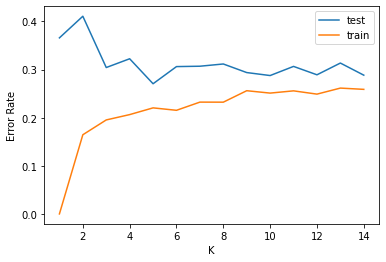

In [150]:
# Extracting k and the test error in a list for easy plotting

kltest = []
vltest = []
for k, v in knn_many_split.items():
  kltest.append(k)
  vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
  kltrain.append(k)
  vltrain.append(knn_many_split[k][0])

# Plotting k vs error error

#Uncomment and answer

plt.plot(kltest, vltest, label = 'test' )
plt.plot(kltrain,vltrain, label = 'train')
plt.legend()
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train)

y_pred_5nn= knn.predict(X_test)
z["5NN predictions"]  = y_pred_5nn



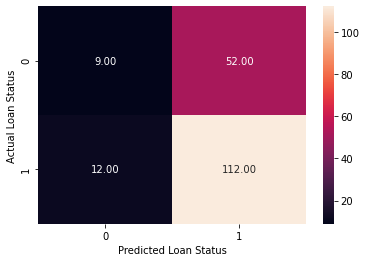

In [45]:
#Your code here for drawing the confusion matrix

draw_cm(Y_test,y_pred_5nn)

In [46]:
# classification report 

print(classification_report(Y_test, y_pred_5nn))

              precision    recall  f1-score   support

           0       0.43      0.15      0.22        61
           1       0.68      0.90      0.78       124

    accuracy                           0.65       185
   macro avg       0.56      0.53      0.50       185
weighted avg       0.60      0.65      0.59       185



## <a id = "link8"></a>Business Insights 

The objective of the classification problem is to predict customer segment for loan approval. For such problem its more significant that the predictions accurately predicts customers for whom loan must not be given. The risk of defaulting the loan payment is far greater than not approving loan for the deserving customer.

Hence Precision is an important measurement for model accuracy. Since the logistic regression have better precision score than kNN hence we can use logistic regression model.

From the coefficients of the logistic regression model we can infer that credit history is an important feature for approving loans.